# Análise III - Dia da Semana

In [157]:
import pandas as pd
import seaborn as sns

In [158]:
gorjetas = pd.read_csv('arquivo/gorjetas.csv')

In [159]:

gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [160]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quita-Feira', 'Sexta-Feira'], dtype=object)

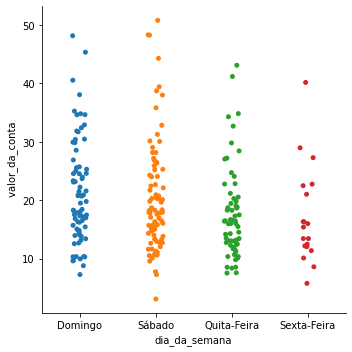

In [161]:
sns.catplot(x='dia_da_semana', y=' valor_da_conta', data=gorjetas)

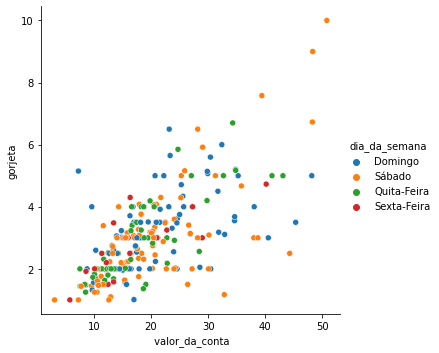

In [162]:
sns.relplot(x=' valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

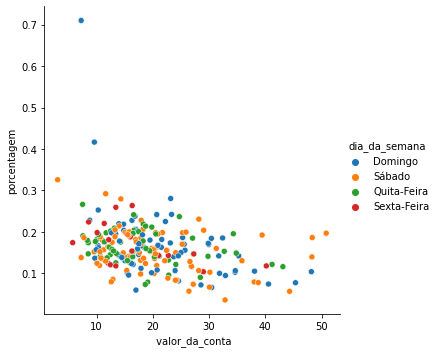

In [163]:
sns.relplot(x=' valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

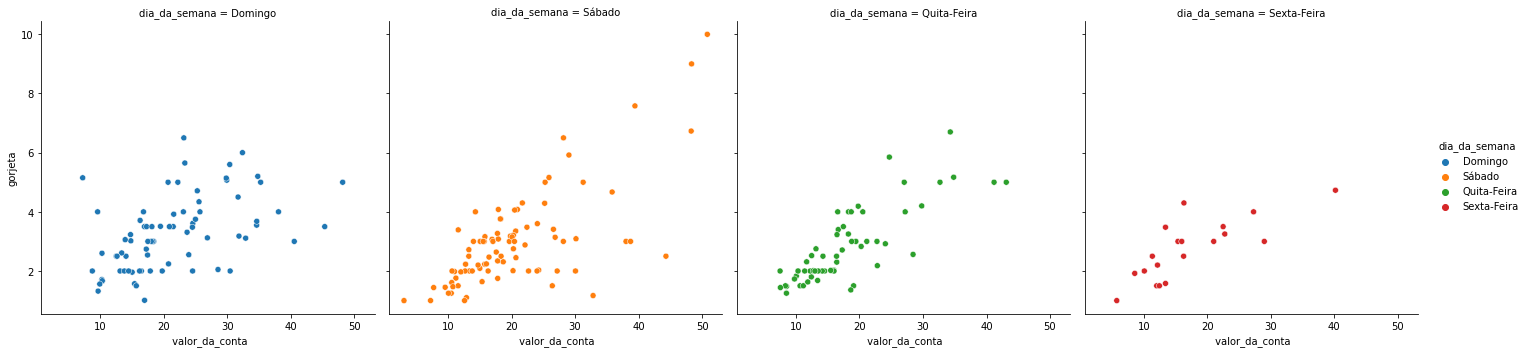

In [164]:
sns.relplot(x=' valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

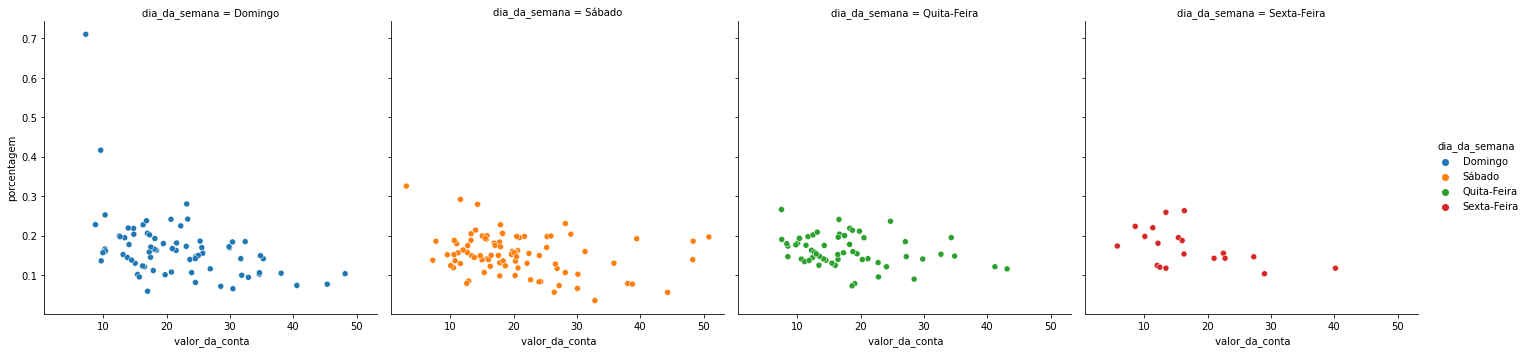

In [165]:
sns.relplot(x=' valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

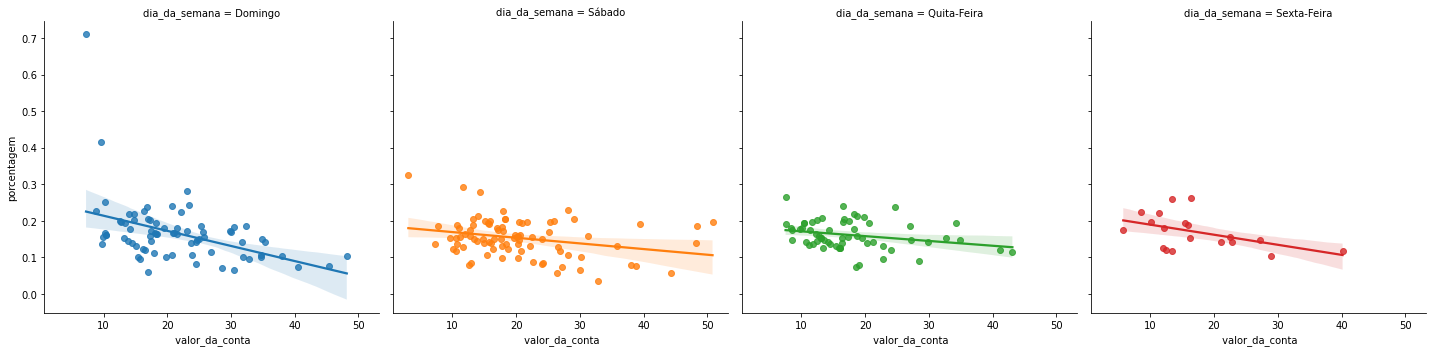

In [166]:
sns.lmplot(x=' valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [167]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [168]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.9982786885245902


In [169]:
gorjetas.groupby(['dia_da_semana']).mean()[[' valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166897
Quita-Feira,17.682742,2.771452,0.161276
Sexta-Feira,17.151579,2.734737,0.169913
Sábado,20.441379,2.993103,0.153152


In [170]:
print('Frequencia dos dias ')
gorjetas.dia_da_semana.value_counts()

Frequencia dos dias 


Sábado         87
Domingo        76
Quita-Feira    62
Sexta-Feira    19
Name: dia_da_semana, dtype: int64

### Teste de Hipótese

H<sup>null</sup>
>**A distribuição do valor da conta é igual no sábado e no domingo**

H<sup>alt</sup>
>**A distribuição do valor da conta não é igual no sábado e no domingo**

In [171]:
gorjetas = gorjetas.rename(columns={' valor_da_conta': 'valor_da_conta'})

In [172]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo' ").valor_da_conta

In [173]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [176]:
from scipy.stats import ranksums
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


H<sup>null</sup>
>**A distribuição do valor da conta é igual no sábado e no domingo**

In [179]:
gorjetas.to_csv('arquivo/gorjetas.csv', index=False)